In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,5617e_00000,0,0.702811,bald,1,120.454653
1,1,5617e_00000,1,0.702811,bald,1,120.454653
2,2,5617e_00000,2,1.401743,bald,1,120.454653
3,3,5617e_00000,3,0.676514,bald,1,120.454653
4,4,5617e_00000,4,0.677604,bald,1,120.454653
...,...,...,...,...,...,...,...
5020,5020,5617e_00024,196,0.618843,random,5,132.965669
5021,5021,5617e_00024,197,0.621784,random,5,132.965669
5022,5022,5617e_00024,198,0.618792,random,5,132.965669
5023,5023,5617e_00024,199,0.619004,random,5,132.965669


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
4020,4020,5617e_00020,0,0.702811,random,1,137.240823
4021,4021,5617e_00020,1,11.079007,random,1,137.240823
4022,4022,5617e_00020,2,7.544524,random,1,137.240823
4023,4023,5617e_00020,3,2.519729,random,1,137.240823
4024,4024,5617e_00020,4,2.070154,random,1,137.240823
...,...,...,...,...,...,...,...
5020,5020,5617e_00024,196,0.618843,random,5,132.965669
5021,5021,5617e_00024,197,0.621784,random,5,132.965669
5022,5022,5617e_00024,198,0.618792,random,5,132.965669
5023,5023,5617e_00024,199,0.619004,random,5,132.965669


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_42361/3751056101.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 1 for label in current_xticks])


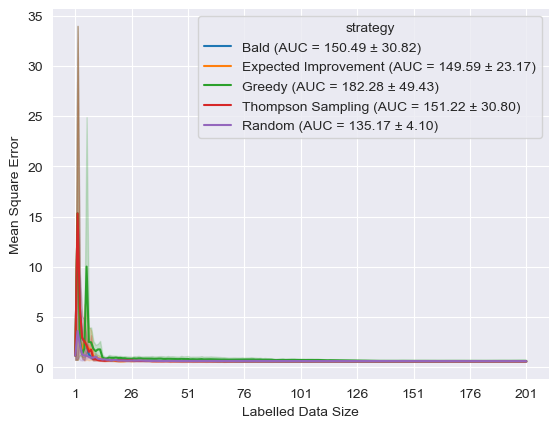

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 1 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)